In [14]:
library(scatterplot3d)

# Load data

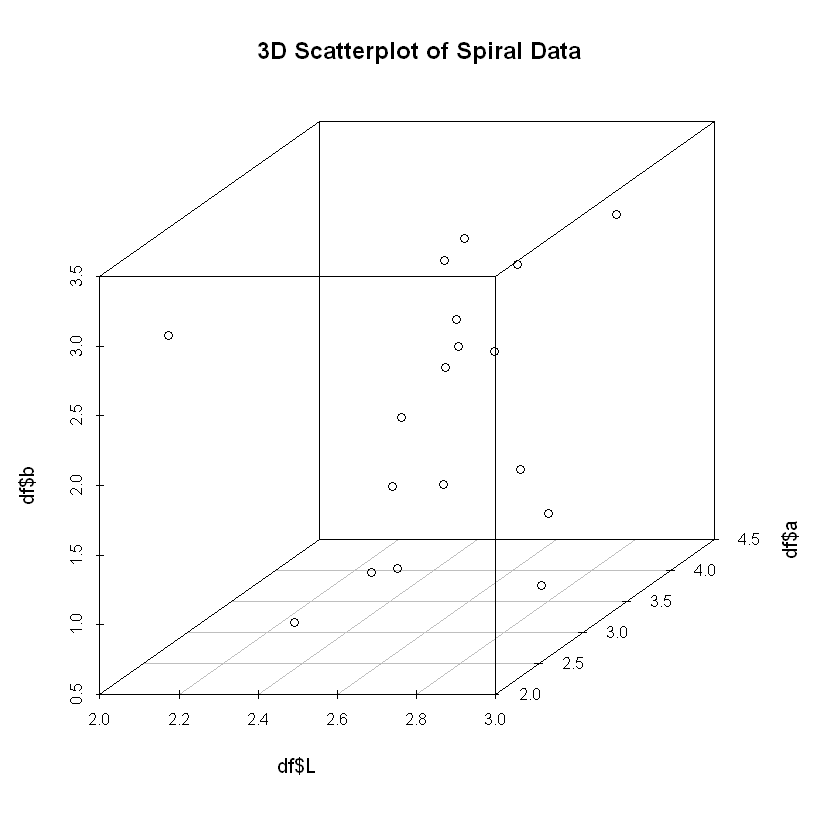

In [19]:
df = read.csv('spiral.csv', sep=';')
scatterplot3d(df$L, df$a, df$b, main="3D Scatterplot of Spiral Data")

# Center data

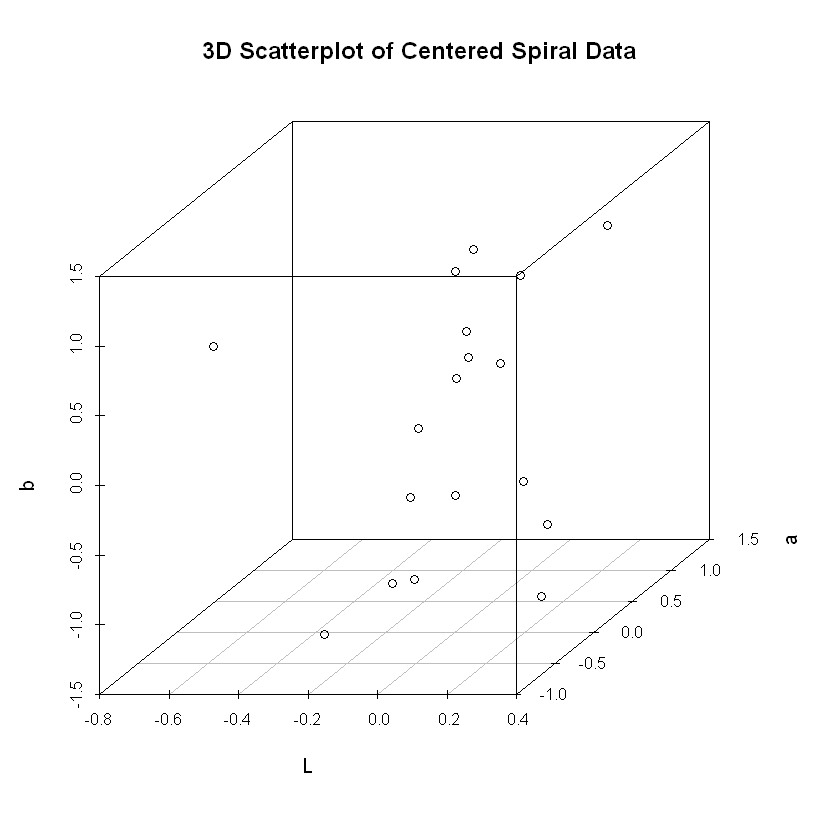

In [30]:
xvarCol = 3:5
X = data.matrix(df[xvarCol])

m = apply(X,2,mean)
s = apply(X,2,sd)

Xc = sweep(X,2,m,"-")

scatterplot3d(Xc, main="3D Scatterplot of Centered Spiral Data")

# Standardizing

Only applicable if the data of the variables strongly differ in variance. When minimizing a sum of squares, the high variance variable will dominate the solution. It is not applicable to this dataset.

To normalize the variable, simply calculate the z-score with $z = \frac{x - \bar{x}}{s}$. 

# Normalizing

The combination of centering and standardizing is called normalizing.

In [32]:
Xcs = sweep(Xc,2,s,"/")
Xcs

L,a,b
-0.443016958,0.76821601,0.15882545
0.633269640,-0.61457281,1.69727879
1.416023530,-0.18357370,-0.82239282
-0.540861195,0.04988416,-0.05922305
-0.491939077,1.12738194,0.23150829
-0.100562132,1.68408913,0.77662955
0.486503286,0.24742542,0.44955679
0.388659049,-1.58432082,-0.88296184
1.024646585,1.84571380,1.16427133
0.780035994,0.71434113,-1.71881444


# Calculate the first principal component (PC1)

Steps to calculate PC1:

 1. The first principal component will be a vector $p_1' = \begin{bmatrix} \beta_1, \beta_2, \beta_3 \end{bmatrix}$.
 2. Project all the samples in the dataset orthogonally onto the vector $p_1'$.
 3. Find the length of the line segment between the sample and the orthogonally projection onto the vector $p_1'$.
 4. Calculate the sum of squares of the line segments.
 5. Determine $\beta_1, \beta_2, \beta_3$ in such a way that the sum of squares is minimized.

# Determining $\beta_1, \beta_2, \beta_3$ of PC1

As a notation, $X_c'$ will denote the transponse of $X_c$. To calculate the covariance matrix, we can determine:

$$ S = \frac{X_c'X_c}{N-1}. $$

The variances are on the main diagonal, and the covariances on the off-diagonal elements.

In [39]:
t(Xc) %*% Xc / (nrow(Xc) - 1)

,L,a,b
L,0.04178203,0.01975752,-0.01214052
a,0.01975752,0.31007712,0.14223203
b,-0.01214052,0.14223203,0.68145752


This can be done quickly with `cov(...)`:

In [40]:
cov(Xc)

,L,a,b
L,0.04178203,0.01975752,-0.01214052
a,0.01975752,0.31007712,0.14223203
b,-0.01214052,0.14223203,0.68145752


The first principle component PC1, vector $p_1' = \begin{bmatrix} \beta_1, \beta_2, \beta_3 \end{bmatrix}$ is the eigenvector with the highest eigenvalue of the covariance matrix. 

In [42]:
eigen(cov(Xc))

eigen() decomposition
$values
[1] 0.72970941 0.26416200 0.03944526

$vectors
             [,1]       [,2]        [,3]
[1,] -0.007505357 -0.1011221  0.99484571
[2,]  0.320680456 -0.9425723 -0.09338946
[3,]  0.947157703  0.3183267  0.03950223


This means that the vector for PC1 is $\begin{bmatrix} -0.0075, -0.1011,  0.9948 \end{bmatrix}$.

In [54]:
p1 = eigen(cov(Xc))$vectors[,1]
p2 = eigen(cov(Xc))$vectors[,2]

# Finding PC2

The second principle component PC2 is orthogonal to PC1. Also, the second principle component is the eigenvector with the second highest value of the covariance matrix, vector $p_2' = \begin{bmatrix} 0.3206, -0.9425, -0.0933 \end{bmatrix}$.

# Rotationary ambivalence

Because there is another vector that is orthogonal to $p_1'$, which is the vector in the opposite direction. Both vectors are correct, and this phenoma is called _rotationary ambivalence_. If you don't like the result, simple change the sign $p := -p$.

In [69]:
p2 = -p2

# Loadings $p$

* Elements in the principle component vector $p$ are also called _loadings_.
* The vectors $p_1$ and $p_2$ are orthogonal to each other, thus they span a plane.
* In the way $p_1$ and $p_2$ are determined, this plane contains the maximed form of information of the samples in the original $v$-dimensional space.
* Then we project the samples in the plane and look at the graph where $p_1$ is the x-axis, and $p_2$ is the y-axis.

# Scores $t$

* Project every samples orthogonal onto the vector $p_1$.
* The distance from the origin $O$ to the orthogonal projection onto $p_1$ is the new x-coordinate of the sample in the $p_1, p_2$-plane.
* These new coordinates are called _Scores_.
* Also do this for $p_2$, and then plot $t_2$ on the y-axis and $t_1$ on the x-axis.

# Calculating scores $t$

For example, project the sample `M17` where $x_c = [-0.16, -0.98, -1.08]$ orthogonal onto $p_1' = [-0.01, 0.32, 0.95]$. The formula for this is:

$$ t = \dfrac{x_c \cdot p_1}{p_1' \cdot p_1} $$

However, the length $l$ of $p_1 = 1$. This means that $p_1' \cdot p_1 = (-0.01) ^2 + 0.32^2 + 0.95^2 = 1$. This simplifies the formula to $t=x_c\cdot p_1$. **(Do note that the multiplication operator $\cdot$ denotes a dot-product between two vectors.)**

In [92]:
Xc[17,] %*% p1

-1.332446


If we do this for all the samples, and plot the scores:

In [106]:
t1 = Xc %*% p1
t2 = Xc %*% p2

# Score plot

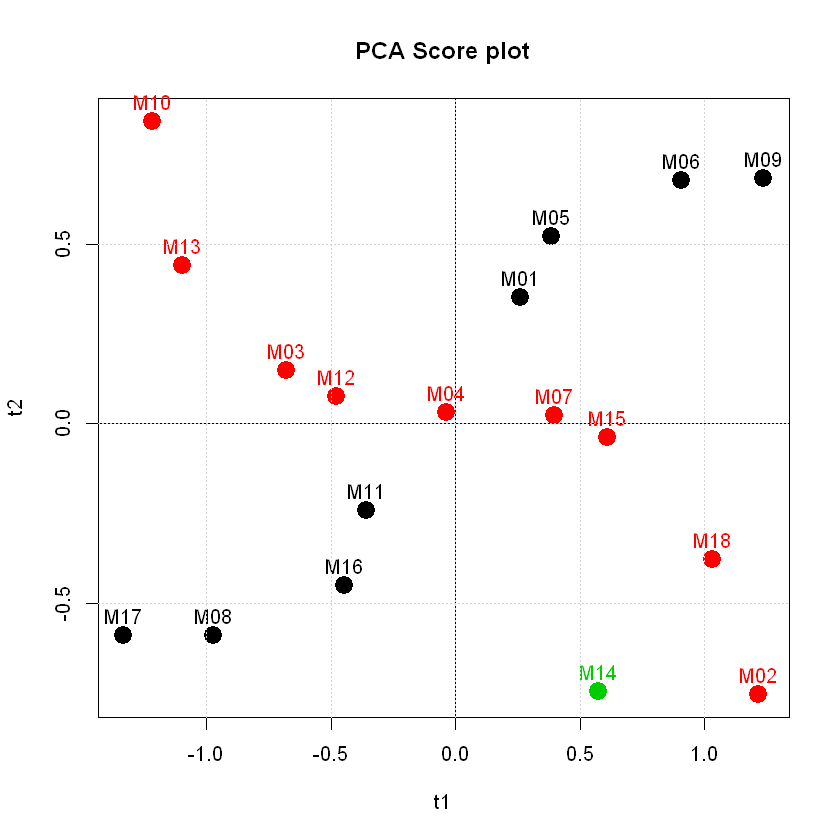

In [107]:
plot(t1, t2, col=df$Spiraal, pch=19, cex=2) 
text(t1, t2, labels=df$Sample, col=df$Spiraal, pos=3, xpd=NA)
abline(h=0,lty=1)
abline(v=0,lty=1)
title(main='PCA Score plot')
grid()

# Loading plot

The loadings $p_1$ and $p_2$ show the most important structure in the dataset. They determine where the samples will end in the score plot: $t = x_c \cdot p$. This means that for $p_1' = [-0.01, 0.32, 0.95 ]$:

 * the variable $L$ is not important.
 * the variable $a$ has a positive contribution.
 * the variable $b$ also has a positive contribution and is the most important one.
 
The loadings plot of $p_1$ and $p_2$ determines the position of the samples in the score plot.

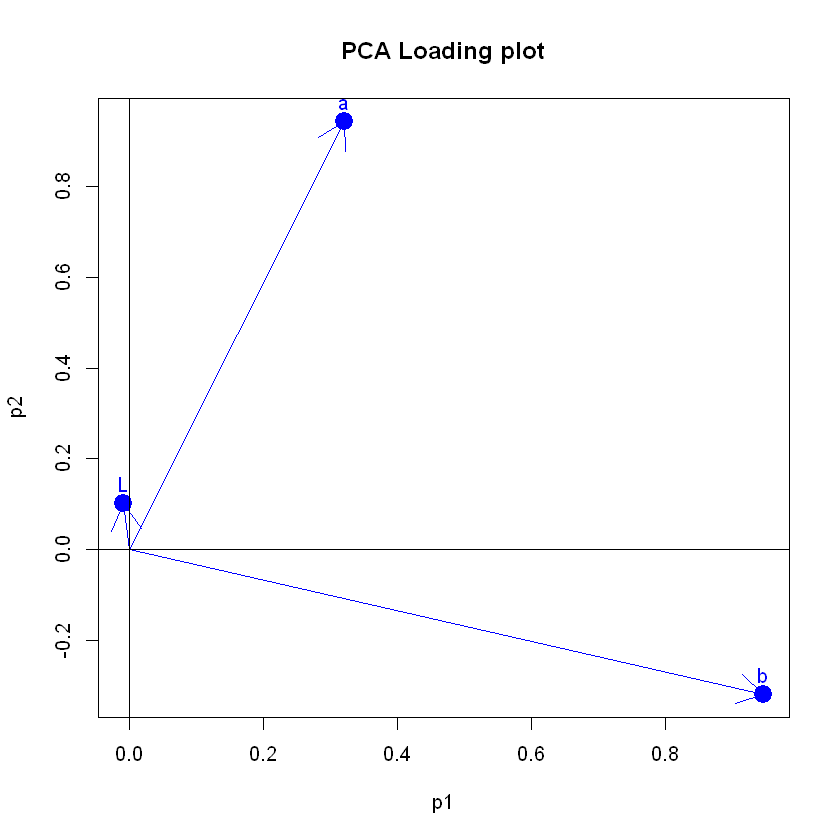

In [112]:
plot(p1,p2,pch=19,cex=2,col="blue")
arrows(0,0,p1,p2,col="blue") 
text(p1,p2,labels=colnames(X),pos=3,col="blue",xpd=NA)
abline(h=0,lty=1)
abline(v=0,lty=1)
title(main="PCA Loading plot")

# Bi-plot

The most informative plot is the combination of the score plot and the loading plot. This is called a bi-plot. Usually the loadings coefficients are very small numbers, compared to the scores. To display them properly into the score plot, they have to be rescaled by a positive constant. This is allowed, because the underlying relationship is what matters. 

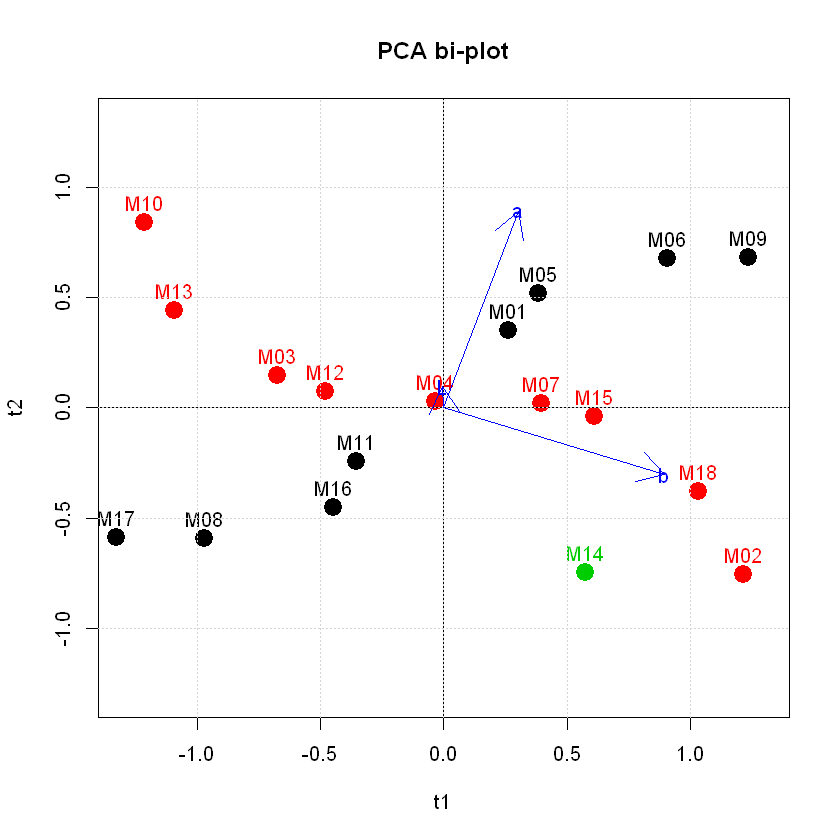

In [118]:
# scores plot
lim = max(t1) * 1.05
plot(t1, t2, col=df$Spiraal, pch=19, cex=2, ylim=c(-lim,lim), xlim=c(-lim,lim)) 
text(t1, t2, labels=df$Sample, col=df$Spiraal, pos=3, xpd=NA)
abline(h=0,lty=1)
abline(v=0,lty=1)
title(main='PCA bi-plot')
grid()

# loading plot
loadingScale = max(p1)
arrows(0,0,p1*loadingScale,p2*loadingScale,col="blue") 
text(p1*loadingScale,p2*loadingScale,labels=c('L', 'a', 'b'), col='blue')